# IBM Employee Attrition and Salary Prediction

__[Link to the Dataset used](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)__

### <font color='red'>I. </font>Importing libraries and loading our dataset:

In [164]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

data=pd.read_csv('Employee.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### <font color='red'>II. </font>Checking for Null values

In [2]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### <i> -Fortunately, we don't have any missing values in our dataset. We can go straight to the Feature Transformation and Data Visualization part. </i>

### <font color='red'>III. </font>Feature transformation for our categorical data:

In [165]:
encoder=LabelEncoder()
data['Attrition']=encoder.fit_transform(data['Attrition'])
data['Over18']=encoder.fit_transform(data['Over18'])
data['OverTime']=encoder.fit_transform(data['OverTime'])
data['Gender']=encoder.fit_transform(data['Gender'])
one_hot=pd.get_dummies(data[["BusinessTravel","Department","MaritalStatus","EducationField","JobRole"]])
data=data.drop(["BusinessTravel","Department","MaritalStatus","EducationField","JobRole"],axis=1)
data=data.join(one_hot)
data.head(20)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,0,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,1,40,...,0,0,0,1,0,0,0,0,0,0
5,32,0,1005,2,2,1,8,4,1,79,...,0,0,0,1,0,0,0,0,0,0
6,59,0,1324,3,3,1,10,3,0,81,...,0,0,0,1,0,0,0,0,0,0
7,30,0,1358,24,1,1,11,4,1,67,...,0,0,0,1,0,0,0,0,0,0
8,38,0,216,23,3,1,12,4,1,44,...,0,0,0,0,0,1,0,0,0,0
9,36,0,1299,27,3,1,13,3,1,94,...,0,1,0,0,0,0,0,0,0,0


In [66]:
print(data.describe())

               Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction       Gender  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769     0.600000   
std              0.0      602.024335                 1

#### <i> -We just need the Attrition mean value here in order to check for imbalance. We can notice that there is a huge imbalance in the attrition value where it is 84%(NO) against 16%(YES) of the two different results.

### <font color='red'>IV. </font> Data Visualization:

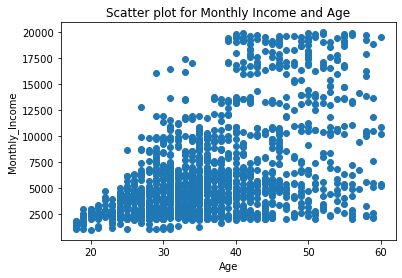

In [129]:
plt.scatter(data["Age"],data["MonthlyIncome"])
plt.title("Scatter plot for Monthly Income and Age")
plt.xlabel("Age")
plt.ylabel("Monthly_Income")
plt.show()

#### <i> -We notice here that people in the Age interval of [40,60] earn a lot more than those in the range of [18,39]</i>

[Text(0.5, 1.0, 'Monthly Income and OverTime ')]

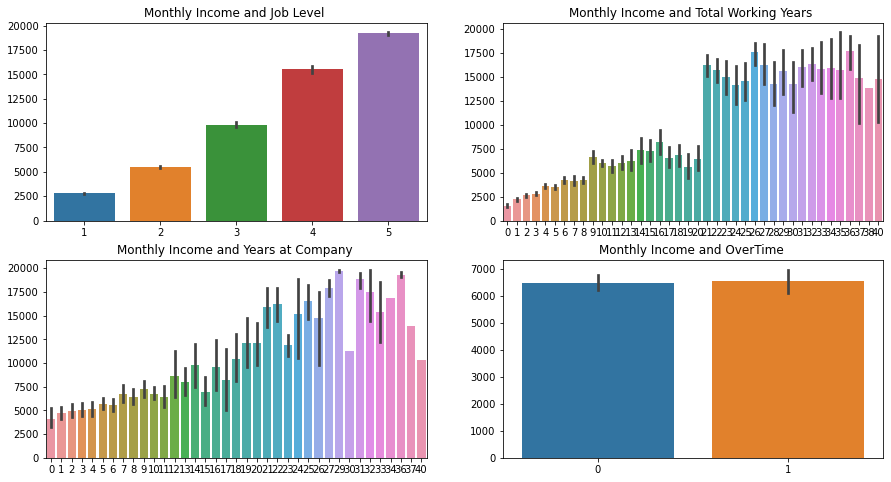

In [137]:
f, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=False, sharey=False)
x = data['JobLevel'].values
y = data['MonthlyIncome'].values
sns.barplot(x, y, ax=axes[0,0])
axes[0,0].set( title = 'Monthly Income and Job Level ')


x = data['TotalWorkingYears'].values
y = data['MonthlyIncome'].values
sns.barplot(x, y, ax=axes[0,1])
axes[0,1].set( title = 'Monthly Income and Total Working Years ')

x = data['YearsAtCompany'].values
y = data['MonthlyIncome'].values
sns.barplot(x, y, ax=axes[1,0])
axes[1,0].set( title = 'Monthly Income and Years at Company ')

x = data['OverTime'].values
y = data['MonthlyIncome'].values
sns.barplot(x, y, ax=axes[1,1])
axes[1,1].set( title = 'Monthly Income and OverTime ')

#### <i>-We can notice here that Age, Job Level, Total Working Years and the Years at Company features are well correlated with the monthly income value which means they are important features if we plan to predict each employee's monthly income. </i> 

### <font color='red'>V. </font> Pearson correlation matrix:

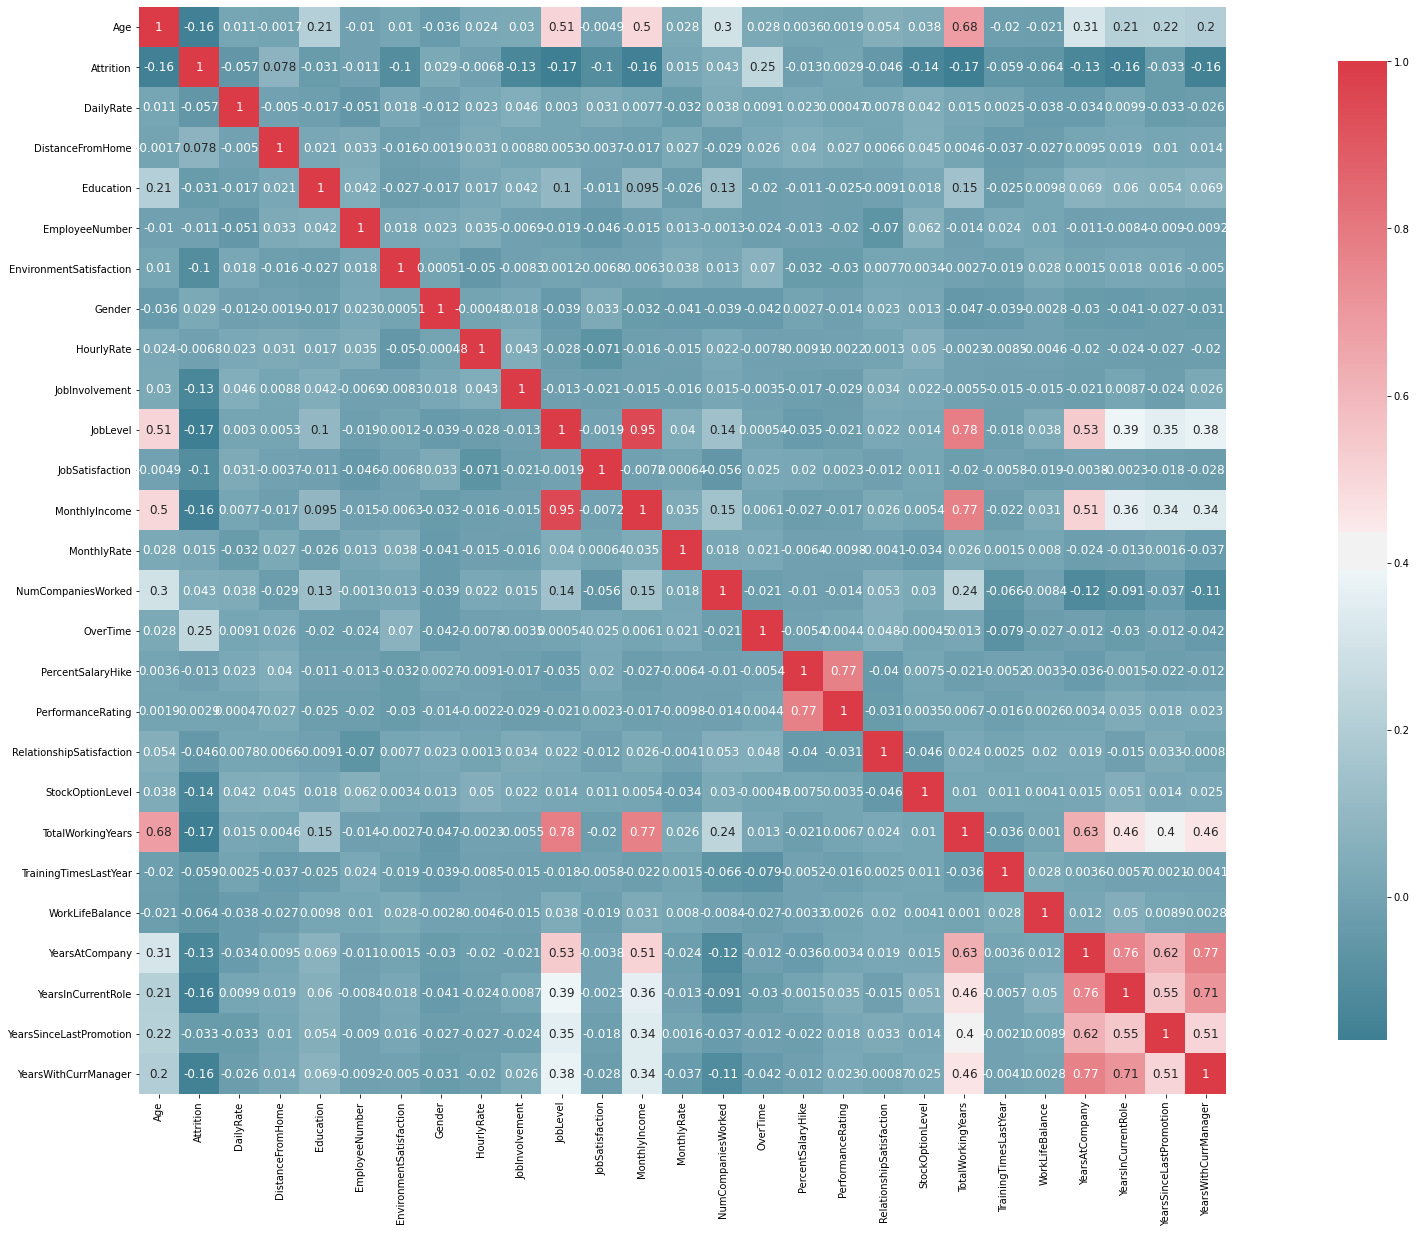

In [37]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 40 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
corredata=pd.DataFrame(data)    
corredata=corredata.drop(corredata.loc[:, 'BusinessTravel_Non-Travel':'JobRole_Sales Representative'].columns, axis = 1 )   
corredata=corredata.drop(["EmployeeCount","Over18","StandardHours"], axis=1)
plot_correlation_map(corredata)
 

#### <i>-Since the one hot encoding transformation created a lot of columns that don't have a huge impact on our correlation, I decided to correlate between most numerical features with a few exceptions from the categorical ones.I also dropped constant values such as EmployeeCount, Over18 and StandardHours.</i>

#### <i>-Besides, we can see that most features don't have a huge importance on our target(Attrition) with a slight exception for the OverTime value.</i>

### <font color='red'>VI. </font> Applying Machine Learning Models in order to predict Monthly Income and Attrition:

#### &emsp; <font color='blue'>1) </font>   Monthly Income Prediction:
#### &emsp;&emsp;  <font color='green'>i. </font>   Linear Regression:

In [147]:
x=data["TotalWorkingYears"].values[:,np.newaxis]
y=data["MonthlyIncome"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 9072877.277273301
R squared 0.6186306655557328


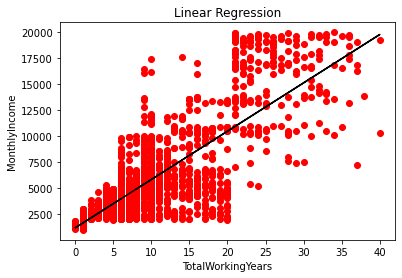

In [148]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("MonthlyIncome")
plt.xlabel("TotalWorkingYears")
plt.plot(x,model.predict(x),color="k")
plt.show()

#### &emsp;&emsp;  <font color='green'>ii. </font>   Multi_Linear Regression:

In [151]:
x=data[["Age","JobLevel","TotalWorkingYears","YearsAtCompany"]]
y=data["MonthlyIncome"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train) 
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 2208590.3523230087
R squared 0.9071641104597206


#### <i> -We can easily notice from the Mean Squared Error and R squared values that a multi_linear regression model is way more accurate than a simple linear one and it gives an acceptable accuracy score for its prediction </i>

#### &emsp; <font color='blue'>2) </font>   Attrition Prediction:
#### &emsp;&emsp;  <font color='green'>i. </font>   Decision Tree:

In [166]:
x=corredata.drop(["Attrition"], axis=1)
y= data["Attrition"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

treek = tree.DecisionTreeClassifier()  
treek.fit(x_train, y_train)   
y_pred=treek.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8027210884353742


#### &emsp;&emsp;  <font color='green'>ii. </font>   Random Forest with normal training/test sets:

In [170]:
x=corredata.drop(["Attrition"], axis=1)
y=corredata["Attrition"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
clf=RandomForestClassifier(n_estimators=800)  
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.8367346938775511


#### &emsp;&emsp;  <font color='green'>ii. </font>   Random Forest using k-fold:

In [173]:
clf=RandomForestClassifier(n_estimators=800)  
scores=cross_val_score(clf,x,y,cv=8)
print("The average accuracy is",sum(scores)/8)

The average accuracy is 0.8571439177952008


#### <i>-We notice now that using the k-fold method helped as gain more accuracy for our prediction model, so now we have ~86% accuracy which is higher than what a random classifier would give since we have an attrition scale of 84:16. </i>

####  <font color='green'><b>We can also use undersampling/oversampling methods in order to deal with this imbalance which would boost our model's accuracy even further.</b> </font>

#### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font color='red'><i>Thank you for your attention!</i></font>